In [65]:
"""
Datta, "Quantum Transport: Atom to Transistor" Fig. 2.3.2

Yong-Hoon Kim, School of Electrical Engineering, Korea Advanced Institute of Science & Technology (KAIST)
2020/11/19
"""
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib import rcParams
#import seaborn as sns

#Constants (all MKS, except energy which is in eV)
au2ang = 0.529177210903
ang2au = 1/au2ang
au2eV = 27.211386245988
eV2au = 1/au2eV

In [66]:
#Lattice
Rmax = 10 * ang2au
NR = 200
dR = Rmax/NR
print('Rmax = %g Ang; NR = %d; dR = %g Ang' % (Rmax*au2ang,NR,dR*au2ang))
#R = dr*np.linspace(1,Nr)
R = dR*np.arange(1,NR+1)
#R = np.arange(dR,Rmax+dr,dR)
#print(R)

Rmax = 10 Ang; NR = 200; dR = 0.05 Ang


In [67]:
#Hamiltonian,H = Kinetic,T + Potential,U + Uscf
t0 = 1/(2 * dR**2)
T = 2*t0*np.eye(NR) - t0*np.eye(NR,k=1) - t0*np.eye(NR,k=-1)
UN = -1/R # Z=1 for H
l = 0
Ul = l*(l+1)/2/R**2

# "eigh" => eigenvalues W in ascending order & normalized eigenvector
D,V = LA.eigh(T + np.diag(UN + Ul)) 
#    print(D.shape)
#    print(D)
E1 = D[0]; psi1 = V[:,0]; P1 = psi1*np.conj(psi1) # \u\^2 * dR
E2 = D[1]; psi2 = V[:,1]; P2 = psi2*np.conj(psi2)

print('Analytical: E1 = %.3f [eV]; E2 = %.3f [eV]' % (-au2eV/2, -au2eV/8))
print('Numerical : E1 = %.3f [eV]; E2 = %.3f [eV]' % (E1*au2eV, E2*au2eV))

# Check the normalization of numerical solutions
#print(sum(P1)); print(sum(P1))

#analytical solutions
P1s = 4*np.exp(-2*R) * R**2 * dR
P2s = 1/2*(1-R/2)**2*np.exp(-R) * R**2 * dR
P2p = 1/24*(R**2)*np.exp(-R) * R**2 * dR
P3s = 4/27*(1-2/3*R+2/27*R**2)**2*np.exp(-2*R/3) * R**2 * dR
P3p = 32/(27**2*3)*(1-R/6)**2*R**2*np.exp(-2*R/3) * R**2 * dR

# Check the normalization of numerical solutions
#print(sum(P1s)); print(sum(P2s)); print(sum(P2p)); print(sum(P3s)); print(sum(P3p))

Analytical: E1 = -13.606 [eV]; E2 = -3.401 [eV]
Numerical : E1 = -13.575 [eV]; E2 = -3.399 [eV]


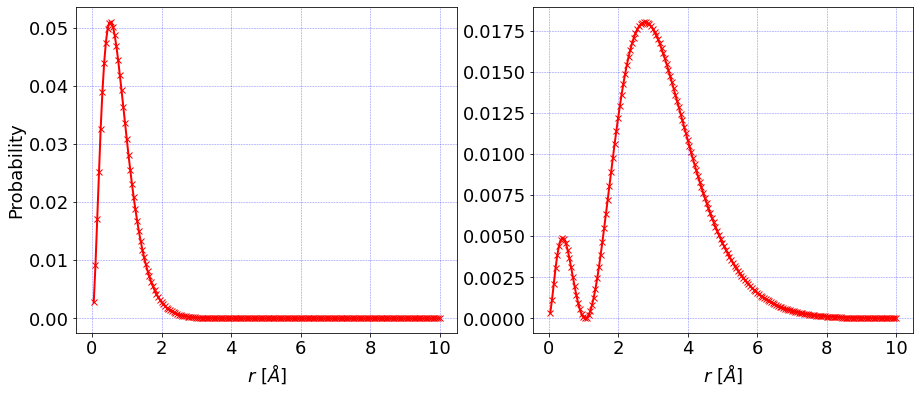

In [79]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.rcParams.update({'font.size': 18})

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(R*au2ang,P1s,'r',lw=2)
ax1.plot(R*au2ang,P1,'rx',lw=2)
ax1.set(xlabel='$r \ [\AA]$')
ax1.set(ylabel='Probability')
ax1.grid(color='b', alpha=0.5, ls='--', lw=0.5)
#ax1.set_xlim([0,5])
#ax1.ylim(0,1)

ax2.plot(R*au2ang,P2s,'r',lw=2)
ax2.plot(R*au2ang,P2,'rx',lw=2)
ax2.set(xlabel='$r \ [\AA]$')
#ax2.set(ylabel='Probability')
ax2.grid(color='b', alpha=0.5, ls='--', lw=0.5)
#ax2.set_xlim([0,5])
#ax2.ylim(0,1)
#tick_params(axis='both',which='major',labelsize=15,direction='in')
#xticks(arange(0.2e-9,1.2e-9,0.2e-9),fontsize=15)
#text(0.1e-9,0.07,'Helium',fontsize=15)
#text(0.15e-9,0.03,'Hydrogen',fontsize=15)